SEX = 'Sex (M: Male, F: Female, I: Infant)'

LENGTH = 'Longest Shell measurement (millimeters - mm)'

DIAMETER = 'Diameter - perpendicular to length (mm)'

HEIGHT = 'Height - with meat in shell (mm)'

WHOLE_WEIGHT = 'Weight of whole abalone (grams)'

SHUCKED_WEIGHT = 'Weight of meat (grams)'

VISCERA_WEIGHT = 'Gut weight after bleeding (grams)'

SHELL_WEIGHT = 'Shell weight - after being dried (grams)'

RINGS = 'Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)'

In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

The first step is to load the dataset and to name the columns with the correct names

In [68]:
# Load dataset from csv to pandas df
abalone_df = pd.read_csv('../dataset/abalone.data.csv',
                              sep=',',
                              header=None, 
                              names=['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings'])

# Exploratory Data Analysis, Data Visualization, and Pre-processing Phase

After loading the dataset, we start the data analysis and pre-processing phases, that begins with understanding the dataset, the values of each column, if there are outliers, etc

In [69]:
abalone_df.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [70]:
# View NAN's
abalone_df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

Since we want to predict the age of the abalones, we need to create that column in the dataset. From the introduction/README.md file, we know that the age of an abalone is the number of rings it has plus 1.5. We will be working with the new created row 'age' as the label for supervised learning.

In [71]:
# Add a new col with the age
abalone_df['age'] = abalone_df.loc[:, 'rings'].map(lambda x: x+1.5, na_action='ignore')

print(abalone_df.head())

  sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings   age  
0         0.150     15  16.5  
1         0.070      7   8.5  
2         0.210      9  10.5  
3         0.155     10  11.5  
4         0.055      7   8.5  


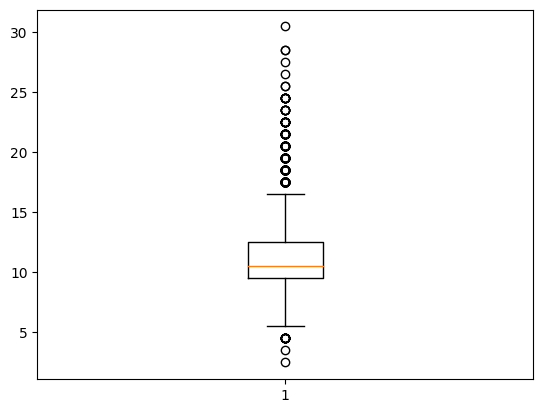

In [72]:
# Analyze the number of 'age' data points that could be outliers
plt.boxplot(abalone_df['age']) 
plt.show()

To evaluate the outliers, we use the z-score which allows to determine the position of a data point from the mean. The standard z-score for a set of values represents 99.7% of the data points within the range of -3 and +3. If a value is not in that interval, it is considered an outlier and will be removed from the dataset.

In [73]:
from scipy import stats
import numpy as np

# Todo: Show a plot of the z score distribution

z = np.abs(stats.zscore(abalone_df[['age']]))
print(z)

print(abalone_df.shape)

abalone_df = abalone_df[(z < 3).all(axis=1)]
print(abalone_df.shape)

           age
0     1.571544
1     0.910013
2     0.289624
3     0.020571
4     0.910013
...        ...
4172  0.330765
4173  0.020571
4174  0.289624
4175  0.020571
4176  0.640960

[4177 rows x 1 columns]
(4177, 10)
(4115, 10)


The column 'sex' is a column of categorical data. We also need to convert this data into numerical data so that it can be understood by our models that we will be using for regression. The step to convert categorical data into numerical data is the process of data encoding. 

In [74]:
# Convert the 'sex' column into dummies cols

abalone_df['sex_original'] = abalone_df['sex']
abalone_df = pd.get_dummies(abalone_df, columns=['sex'], dtype=float)
abalone_df.rename(columns={"sex_original": "sex"}, inplace=True)

print(abalone_df.head())

   length  diameter  height  whole weight  shucked weight  viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings   age sex  sex_F  sex_I  sex_M  
0         0.150     15  16.5   M    0.0    0.0    1.0  
1         0.070      7   8.5   M    0.0    0.0    1.0  
2         0.210      9  10.5   F    1.0    0.0    0.0  
3         0.155     10  11.5   M    0.0    0.0    1.0  
4         0.055      7   8.5   I    0.0    1.0    0.0  


<BarContainer object of 19 artists>

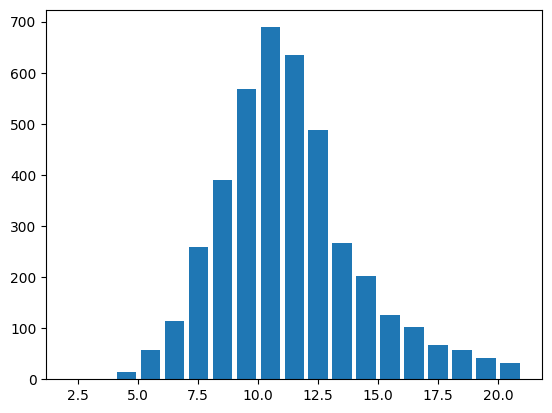

In [75]:
# Visualize the distribution of ages of the abalones
age_distribution = abalone_df.groupby(['age']).size().reset_index(name='counts')
# print(age_distribution)
plt.bar(x=age_distribution['age'], height=age_distribution['counts'])

['length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'sex_F', 'sex_I', 'sex_M']


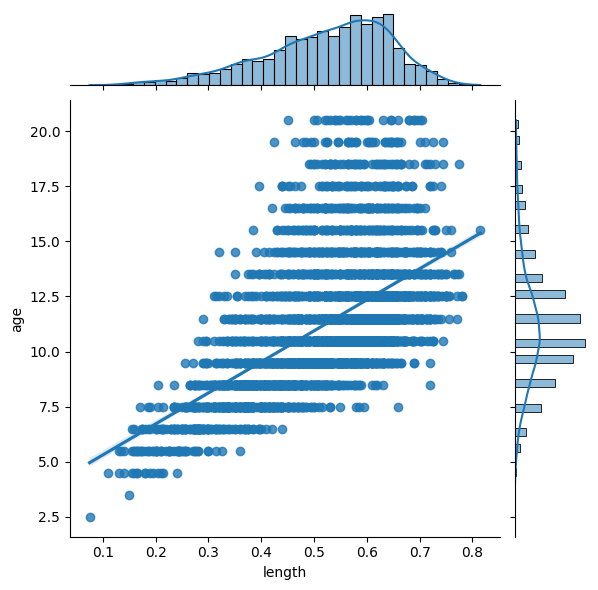

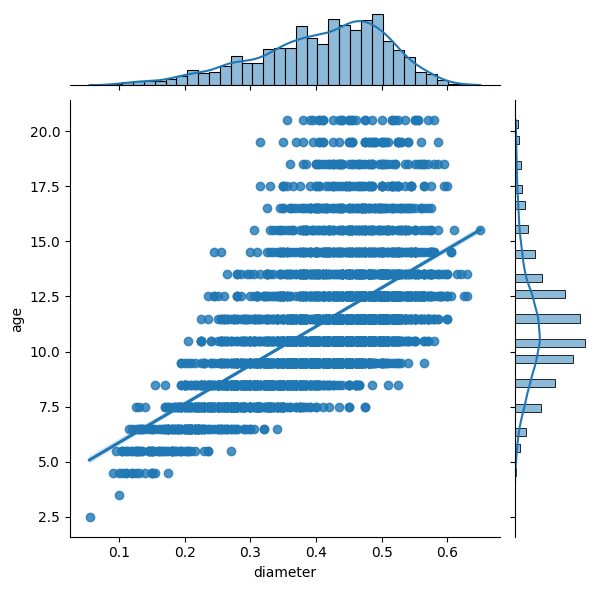

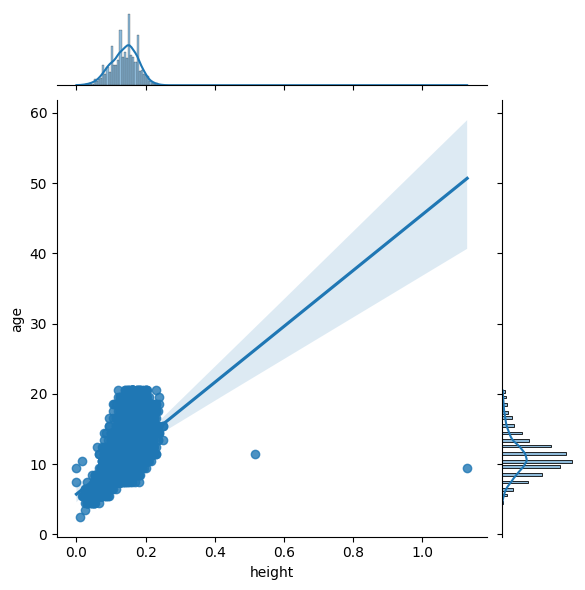

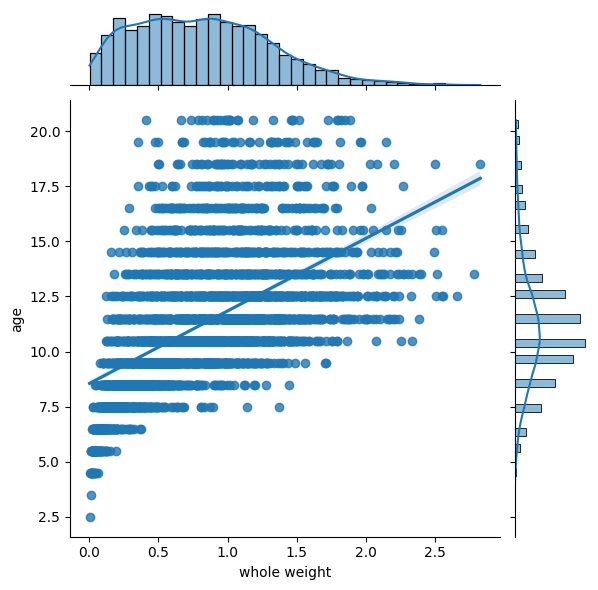

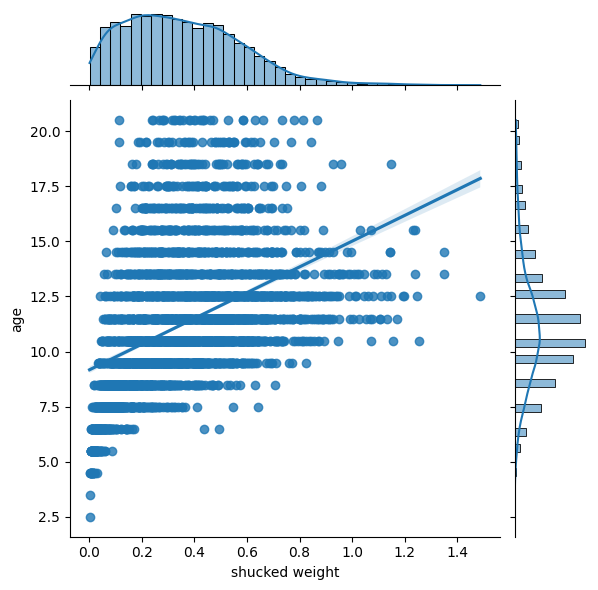

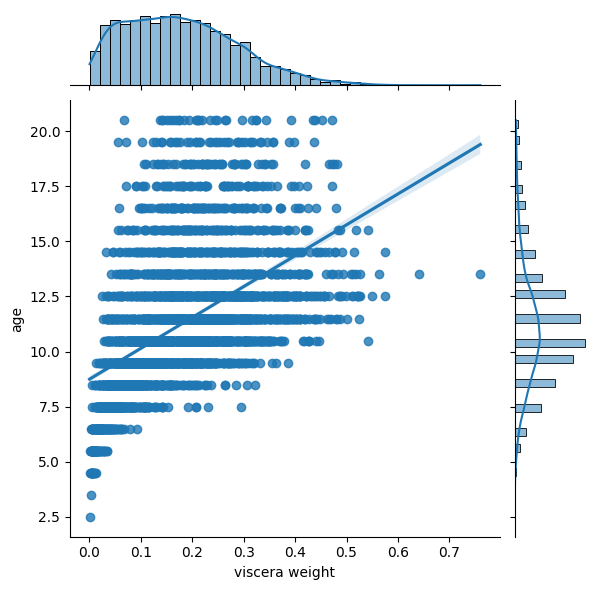

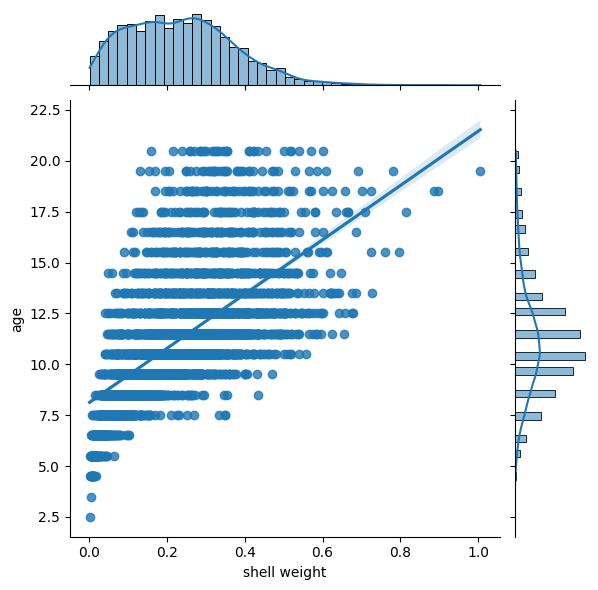

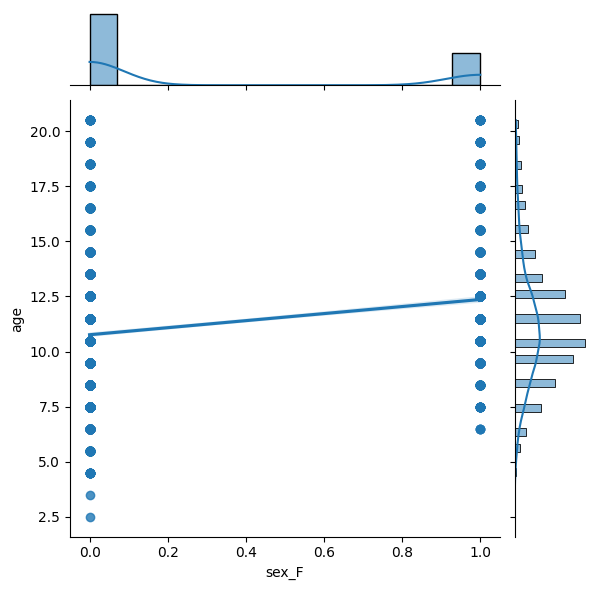

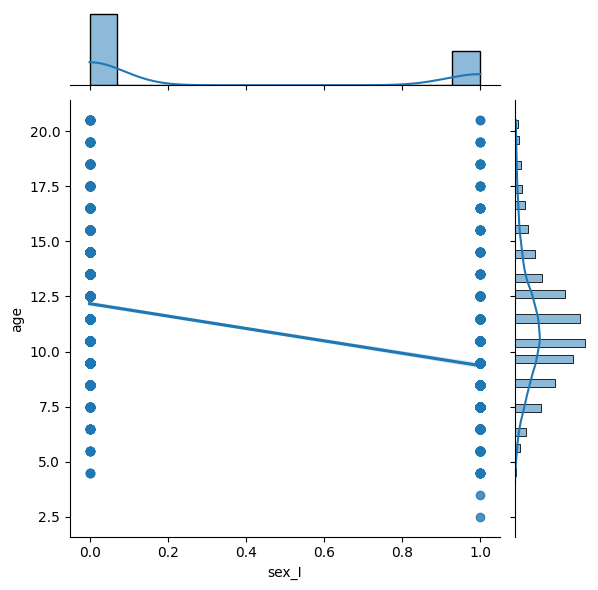

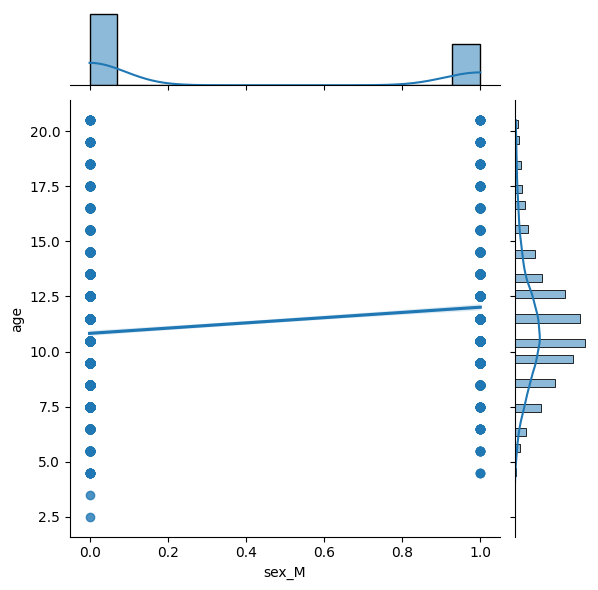

In [76]:
features = [col for col in abalone_df.columns if col not in ['age', 'rings', 'sex']]
print(features)
for feature in features:
    sns.jointplot(data=abalone_df, x=feature, y='age', kind="reg")
plt.show()

In [77]:
# Pearson correlation
corr_matrix = abalone_df.corr(numeric_only=True)
corr_matrix_age = corr_matrix['age'].sort_values(ascending=False)
print(corr_matrix_age)

rings             1.000000
age               1.000000
shell weight      0.629272
diameter          0.599826
length            0.582744
height            0.571934
whole weight      0.553855
viscera weight    0.528306
shucked weight    0.447158
sex_F             0.254694
sex_M             0.196776
sex_I            -0.453550
Name: age, dtype: float64


# Supervised Machine Learning Models - Regression models

After the pre-processing phase, we have the data organized and ready to use. Since the objective is to predict the age of the an abalone based on various physical characteristics and we have labeled data to use, we will be using regression models in this project. Despite having labeled data, there is also the possibility of using unsupervised techniques, however, the main focus will be supervised techniques.

Note: There isn't only a single pre-processing phase. Processing the data, changing the data and evaluating it is something that occurs over the duration of the project and there is always room to improve the dataset.

In [78]:
# general imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

Since we have a dataset with a significant amount of samples (4115, after removing the outliers) we will be splitting the dataset into two parts: a training set and a testing set. The training set will be the one used to train the model and find the best hyperparameters of a model. The testing set will never be seen by the model during the training phase and will be only used after training the model to evaluate the performance of the model when confronted with data that it has never seen before. 

In [79]:
# Split dataset into a training dataset and a testing dataset
X = abalone_df.drop(['rings', 'age', 'sex'], axis=1)
y = abalone_df['age']

# Split into 80% training (3292 samples) and 20% testing (823 samples)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [80]:
results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MSA', 'R2'])

## Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

lr_train_scores = cross_val_score(linear_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lr_train_rmse_scores = np.sqrt(-lr_train_scores)

lr_train_mean_score = lr_train_rmse_scores.mean()
print(lr_train_mean_score)
lr_train_std_score = lr_train_mean_score.std()
print(lr_train_std_score)

1.9900430923318022
0.0


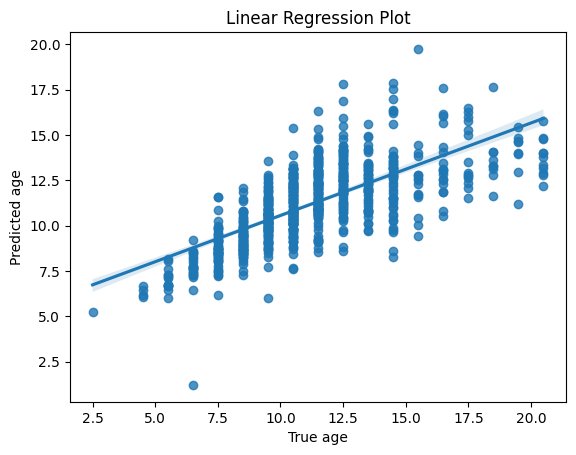

In [82]:
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_msa = mean_absolute_error(y_test, y_pred)
lr_r2_score = r2_score(y_test, y_pred)

linear_reg_df = pd.DataFrame([{'Model': 'Linear Regression', 'MSE': lr_mse, 'RMSE': lr_rmse, 'MSA':lr_msa, 'R2': lr_r2_score}])
results = pd.concat([results, linear_reg_df])

ax = sns.regplot(x=y_test, y=y_pred)
ax.set(title='Linear Regression Plot', xlabel='True age', ylabel='Predicted age')
plt.show()

## Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_train_scores = cross_val_score(ridge_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
ridge_train_rmse_scores = np.sqrt(-lr_train_scores)

ridge_train_mean_score = ridge_train_rmse_scores.mean()
print(ridge_train_mean_score)
ridge_train_std_score = ridge_train_mean_score.std()
print(ridge_train_std_score)

1.9900430923318022
1.9900430923318022


In [84]:
param_grid = [
    {'alpha': [0.001, 0.0001, 0.005, 0.01, 1], 'solver': ['auto']}
]

ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='neg_mean_squared_error')

ridge_grid_search.fit(X_train, y_train)

print(ridge_grid_search.best_params_)

{'alpha': 1, 'solver': 'auto'}


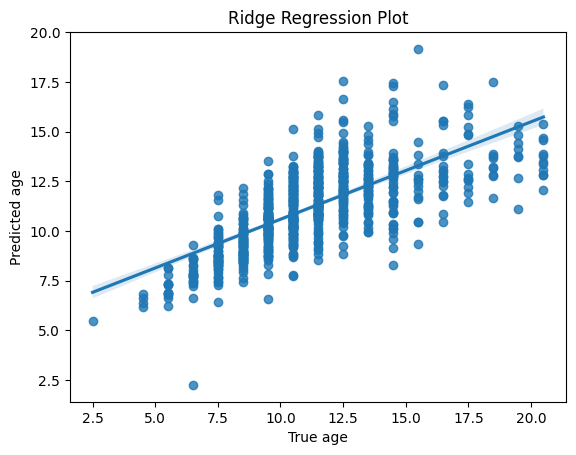

In [85]:
ridge_best = ridge_grid_search.best_estimator_
y_pred = ridge_best.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_msa = mean_absolute_error(y_test, y_pred)
ridge_r2_score = r2_score(y_test, y_pred)

ridge_df = pd.DataFrame([{'Model': 'Ridge Regression', 'MSE': ridge_mse, 'RMSE': ridge_rmse, 'MSA': ridge_msa, 'R2': ridge_r2_score}])
results = pd.concat([results, ridge_df])

ax = sns.regplot(x=y_test, y=y_pred)
ax.set(title='Ridge Regression Plot', xlabel='True age', ylabel='Predicted age')
plt.show()


## Lasso Regression

In [86]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_train_scores = cross_val_score(lasso_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lasso_train_rmse_scores = np.sqrt(-lr_train_scores)

lasso_train_mean_score = lasso_train_rmse_scores.mean()
print(lasso_train_mean_score)
lasso_train_std_score = lasso_train_mean_score.std()
print(lasso_train_mean_score)

1.9900430923318022
1.9900430923318022


In [87]:
param_grid = [
    {'alpha': [0.001, 0.0001, 0.005, 0.01, 1], 'tol': [0.0001, 0.001, 0.01]}
]

lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=10, scoring='neg_mean_squared_error')

lasso_grid_search.fit(X_train, y_train)

print(lasso_grid_search.best_params_)

{'alpha': 0.001, 'tol': 0.0001}


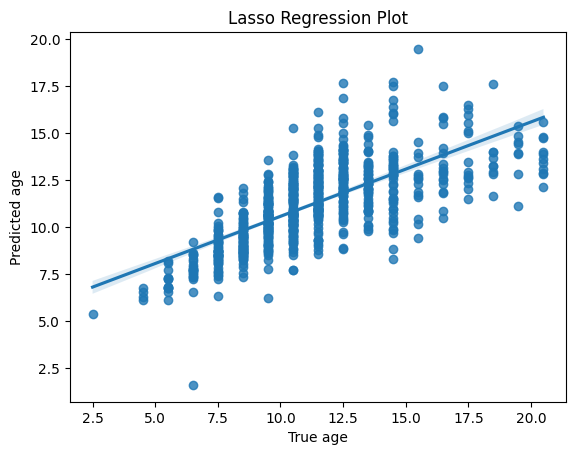

In [88]:
lasso_best = lasso_grid_search.best_estimator_
y_pred = lasso_best.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_msa = mean_absolute_error(y_test, y_pred)
lasso_r2_score = r2_score(y_test, y_pred)

lasso_df = pd.DataFrame([{'Model': 'Lasso Regression', 'MSE': lasso_mse, 'RMSE': lasso_rmse, 'MSA': lasso_msa, 'R2': lasso_r2_score}])
results = pd.concat([results, lasso_df])

ax = sns.regplot(x=y_test, y=y_pred)
ax.set(title='Lasso Regression Plot', xlabel='True age', ylabel='Predicted age')
plt.show()

## Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(rmse_scores.std())

[2.79501721 2.86937856 2.55695012 3.08541032 2.84663722 2.54563217
 2.4784788  2.62209457 2.55873259 2.4790919 ]
2.6837423465317927
0.19321188017327956


In [90]:
param_grid = [
    {'max_features': [2, 3, 4, 5, 6, 8, 10]}
]

tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_features': 5}


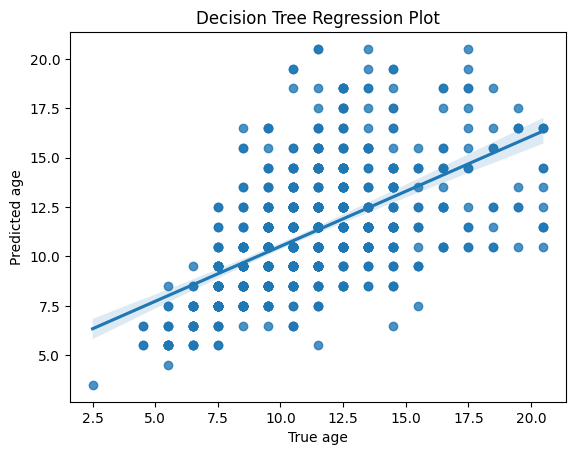

In [91]:
tree_best = grid_search.best_estimator_

y_pred = tree_best.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_msa = mean_absolute_error(y_test, y_pred)
tree_r2_score = r2_score(y_test, y_pred)

decision_tree_df = pd.DataFrame([{'Model': 'Decision Tree', 'MSE': tree_mse, 'RMSE': tree_rmse, 'MSA': tree_msa, 'R2': tree_r2_score}])
results = pd.concat([results, decision_tree_df])

ax = sns.regplot(x=y_test, y=y_pred)
ax.set(title='Decision Tree Regression Plot', xlabel='True age', ylabel='Predicted age')
plt.show()

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_train_pred = forest_reg.predict(X_train)

forest_mse = mean_squared_error(y_train, y_train_pred)

forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, X, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores)
print(forest_rmse_scores.mean())
print(forest_rmse_scores.std())


0.7118962236820976
[2.43374093 2.70744582 1.51113513 1.54772539 1.59237824 2.50326065
 1.30960238 2.20568299 1.60046526 1.93273227]
1.93441690480113
0.4681532492965411


In [93]:
param_grid = [
    {'n_estimators': [10, 30, 50], 'max_features': [2, 3, 4, 5, 6, 8, 10]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_features': 3, 'n_estimators': 50}


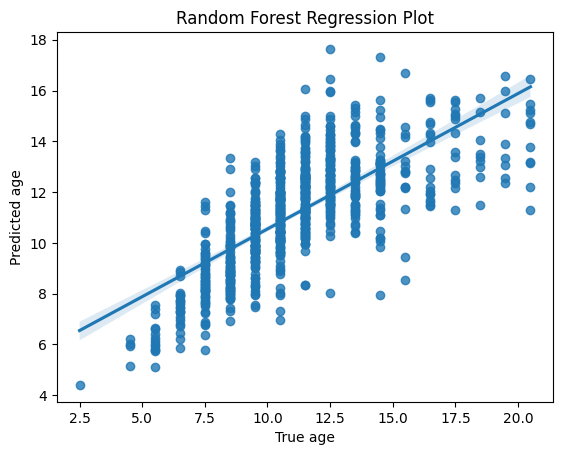

In [94]:
best_random_forest_reg = grid_search.best_estimator_
y_pred = best_random_forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_msa = mean_absolute_error(y_test, y_pred)
forest_r2_score = r2_score(y_test, y_pred)

random_forest_df = pd.DataFrame([{'Model': 'Random Forest', 'MSE': forest_mse, 'RMSE': forest_rmse, 'MSA': forest_msa, 'R2': forest_r2_score}])
results = pd.concat([results, random_forest_df])

ax = sns.regplot(x=y_test, y=y_pred)
ax.set(title='Random Forest Regression Plot', xlabel='True age', ylabel='Predicted age')
plt.show()

In [95]:
results

,Model,MSE,RMSE,MSA,R2
0,Linear Regression,4.406187,2.099092,1.557590,0.498523
0,Ridge Regression,4.403938,2.098556,1.557992,0.498779
0,Lasso Regression,4.411221,2.100291,1.560957,0.497950
0,Decision Tree,7.292831,2.700524,1.927096,0.169988
0,Random Forest,4.120808,2.029977,1.497181,0.531003
